# Logistic Regression

This notebook is used for explaining the steps involved in creating a Logistic Regression model 


1. Import the required libraries
2. Download the required dataset
3. Read the Dataset 
4. Observe the DataSet
5. Visualize the data
6. Data Preprocessing
7. Splitting the data into test and train set
8. Build a Logistic Regression model
9. Training the model
10. Making Prediction using Trained Model
11. Printing the test accuracy
12. Printing the classification report

##Import the required libraries

In [ ]:
import pandas as pd                                     # This library is used for data analysis
import numpy as np                                      # This library is used for working with arrays and performing various linear algebra operations                
import zipfile                                          # This library is used  to unzip the zip files
import seaborn as sns                                   # This library is used to plot curves
from sklearn.preprocessing import StandardScaler        # This library is used to scale the data 
from sklearn.pipeline import make_pipeline     
from sklearn.linear_model import LogisticRegression     # This library is used to import logistic Regression Model
from sklearn.model_selection import train_test_split    # This library is used to split the dataset into train and test data.

##  Download the required dataset

In [ ]:
!gdown --id 1-xFypvfE0FsQ6wNMVqYeEglDIB4ZTlP0

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-xFypvfE0FsQ6wNMVqYeEglDIB4ZTlP0
To: /content/bank_data.zip
100% 60.2k/60.2k [00:00<00:00, 56.9MB/s]


In [ ]:
with zipfile.ZipFile("/content/bank_data.zip","r") as zip_ref:         #Extracting the data
    zip_ref.extractall("/content") 

## Read the dataset

In [ ]:
data = pd.read_csv('/content/bank.csv', header=0,delimiter=';')
data = data.dropna()

## Observe the dataset

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Visualize the data

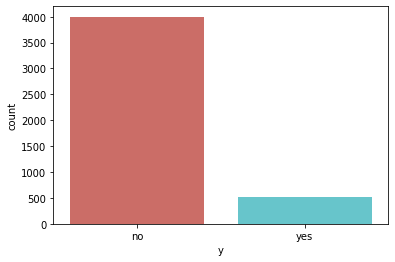

In [ ]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

## Data Preprocessing

In [ ]:
education = pd.get_dummies(data['education'], prefix="education")   
data = pd.concat([data, education],axis=1)                
data = data.drop('education',axis=1)                   

In [ ]:
marital = pd.get_dummies(data['marital'], prefix="marital")   
data = pd.concat([data, marital],axis=1)                
data = data.drop('marital',axis=1)   

In [ ]:
job = pd.get_dummies(data['job'], prefix="marital")   
data = pd.concat([data, job],axis=1)                
data = data.drop('job',axis=1) 

In [ ]:
default = pd.get_dummies(data['default'], prefix="default")   
data = pd.concat([data, default],axis=1)                
data = data.drop('default',axis=1) 

In [ ]:
housing = pd.get_dummies(data['housing'], prefix="housing")   
data = pd.concat([data, housing],axis=1)                
data = data.drop('housing',axis=1) 

In [ ]:
loan = pd.get_dummies(data['loan'], prefix="loan")   
data = pd.concat([data, loan],axis=1)                
data = data.drop('loan',axis=1) 

In [ ]:
contact = pd.get_dummies(data['contact'], prefix="contact")   
data = pd.concat([data, contact],axis=1)                
data = data.drop('contact',axis=1) 

In [ ]:
month = pd.get_dummies(data['month'], prefix="month")   
data = pd.concat([data, month],axis=1)                
data = data.drop('month',axis=1) 

In [ ]:
poutcome = pd.get_dummies(data['poutcome'], prefix="poutcome")   
data = pd.concat([data, poutcome],axis=1)                
data = data.drop('poutcome',axis=1) 

In [ ]:
data

,age,balance,day,duration,campaign,pdays,previous,y,education_primary,education_secondary,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,no,1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,no,0,1,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,no,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,no,0,1,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,no,0,1,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,no,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.loc[data["y"] == "yes", "y"] = 1
data.loc[data["y"] == "no", "y"] = 0

In [ ]:
y = data['y']
data = data.drop('y', axis=1)
X= data

In [ ]:
X

,age,balance,day,duration,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y.unique()

array([0, 1], dtype=object)

In [ ]:
y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: object

In [ ]:
X=np.array(X)
y=np.array(y)
y=y.astype('int') 

## Splitting the data into test and train set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Build a Logistic Regression model

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression())

## Training the model

In [ ]:
model.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## Making prediction using Trained Model

In [ ]:
y_pred=model.predict(X_test)

## Printing the test accuracy

In [ ]:
model.score(X_test,y_test)

0.9036251105216623

## Printing the Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1058
           1       0.37      0.70      0.48        73

    accuracy                           0.90      1131
   macro avg       0.67      0.81      0.72      1131
weighted avg       0.94      0.90      0.92      1131

